In [84]:
import pandas as pd
import numpy as np

In [85]:
medical_df = pd.read_csv("data/insurance.csv")


In [86]:
medical_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [88]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize']  = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Finding Charges of person who is smoking

In [89]:
smoker_df = medical_df[medical_df.smoker == 'yes']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

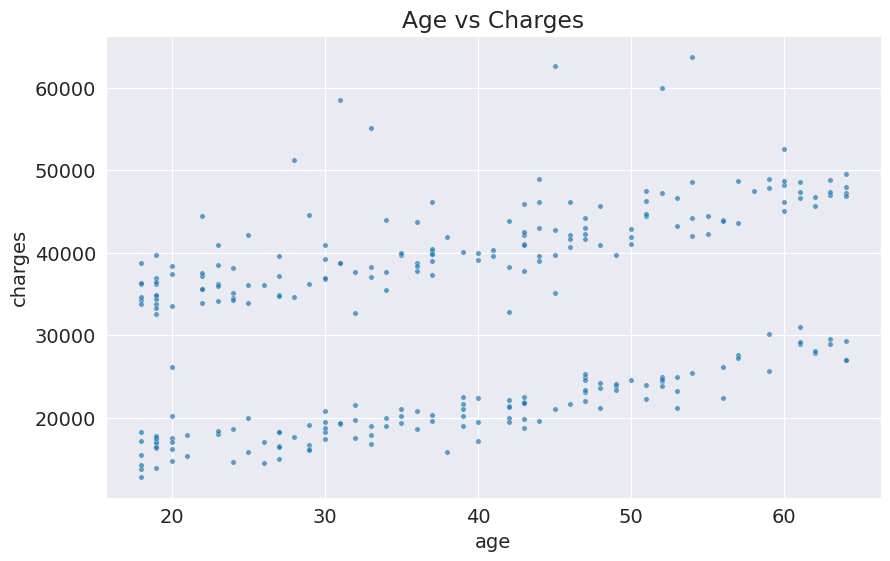

In [90]:
plt.title('Age vs Charges')
sns.scatterplot(data= smoker_df, x='age', y='charges',alpha=0.7, s = 15)


### Now repeating same steps for the Smoker == Yes

### Seperating the person whom Charges are  greater than $30k.

In [91]:
medical_df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Seperating the person whom Charges are  greater than $30k.

In [92]:
smoker_df_chargesGr30k = medical_df[(medical_df['smoker'] == 'yes') & (medical_df['charges'] > 30000)]
smoker_df_chargesGr30k

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

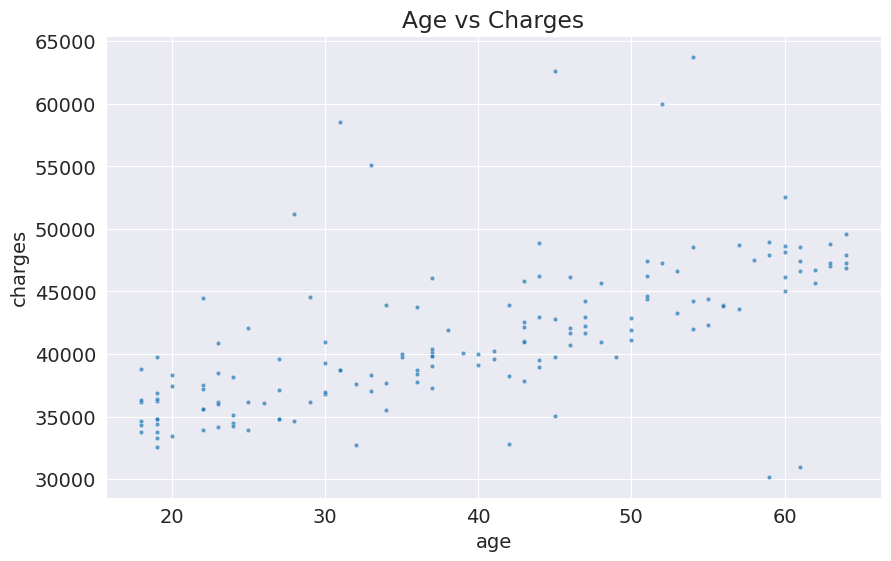

In [93]:
plt.title('Age vs Charges')
sns.scatterplot(data= smoker_df_chargesGr30k, x='age', y='charges',alpha=0.7, s = 10)

# Model

In [94]:
def estimate_charges(age, w, b):   # this is estimated charges function and guessing the value of w and b and it is our first model
    return w * age + b

In [95]:
w = 700
b = 20000

In [96]:
estimate_charges(30,w,b)

41000

In [97]:
ages = smoker_df_chargesGr30k.age
ages

14      27
19      30
23      34
29      31
30      22
        ..
1301    62
1303    43
1308    25
1313    19
1323    42
Name: age, Length: 152, dtype: int64

In [98]:
estimated_charges  = estimate_charges(ages,w,b)
estimated_charges

14      38900
19      41000
23      43800
29      41700
30      35400
        ...  
1301    63400
1303    50100
1308    37500
1313    33300
1323    49400
Name: age, Length: 152, dtype: int64

In [99]:
smoker_df_chargesGr30k.charges

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1301    46718.16325
1303    37829.72420
1308    33900.65300
1313    36397.57600
1323    43896.37630
Name: charges, Length: 152, dtype: float64

Text(0, 0.5, 'Estimated_charges')

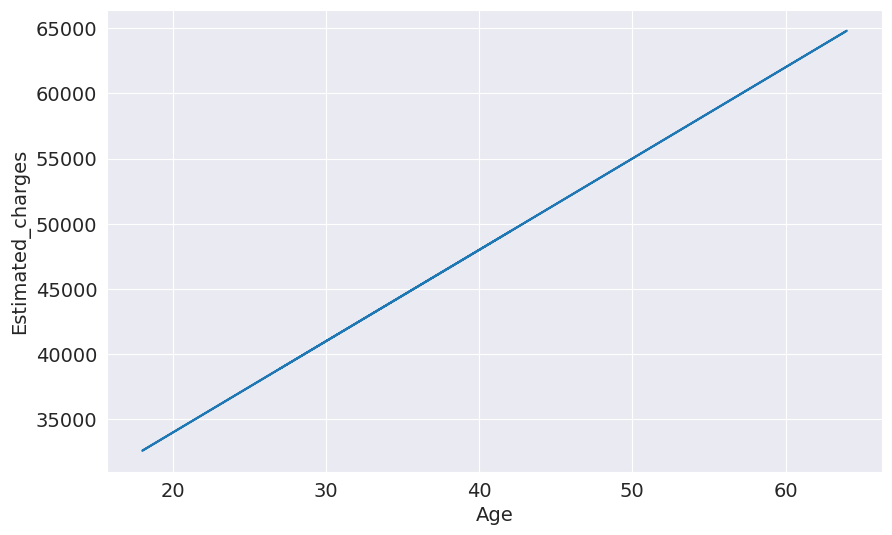

In [100]:
plt.plot(ages, estimated_charges);
plt.xlabel("Age");
plt.ylabel("Estimated_charges")

As expectecd,the points lie on a straight line.
We can overlay this line on the actual data, so see how well our model fits the data.

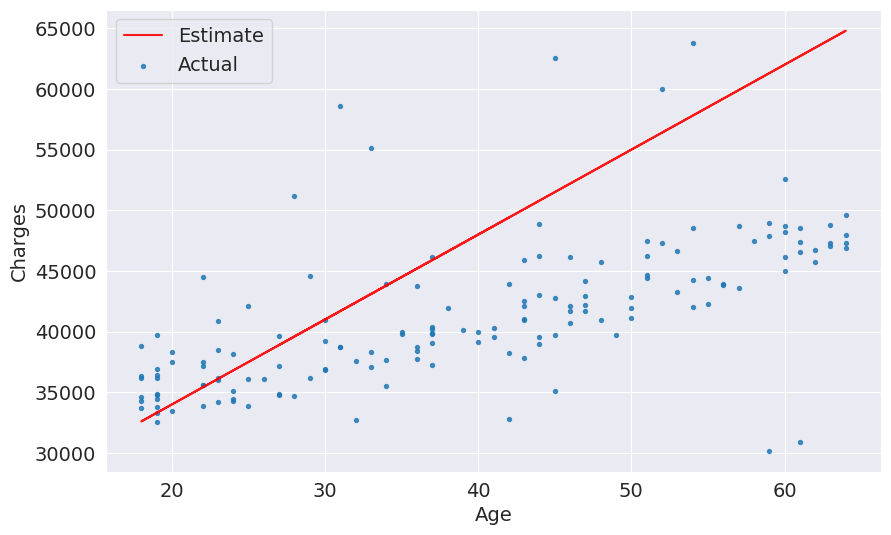

In [101]:
target = smoker_df_chargesGr30k.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel("Age");
plt.ylabel("Charges")
plt.legend(['Estimate','Actual'])

Our estimates are quite poor and the line does not "fit" the data, now try different values of w and b

In [102]:
def try_parameters(w,b):
    ages = smoker_df_chargesGr30k.age
    target = smoker_df_chargesGr30k.charges
    
    estimated_charges = estimate_charges(ages, w,b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel("Age");
    plt.ylabel("Charges")
    plt.legend(['Estimate','Actual'])

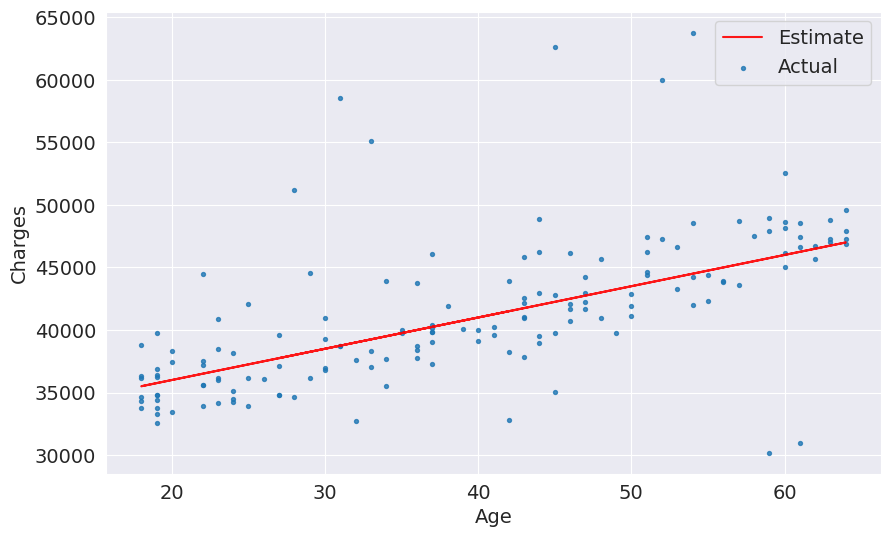

In [103]:
try_parameters(250,31000)

In [104]:
targets = smoker_df_chargesGr30k.charges
targets

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1301    46718.16325
1303    37829.72420
1308    33900.65300
1313    36397.57600
1323    43896.37630
Name: charges, Length: 152, dtype: float64

In [105]:
predictions = estimated_charges
predictions

14      38900
19      41000
23      43800
29      41700
30      35400
        ...  
1301    63400
1303    50100
1308    37500
1313    33300
1323    49400
Name: age, Length: 152, dtype: int64

### Trying to find root mean square error

In [106]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

### Let compute the RMSE for our model with a sample set of weights

In [107]:
w = 250
b = 31000

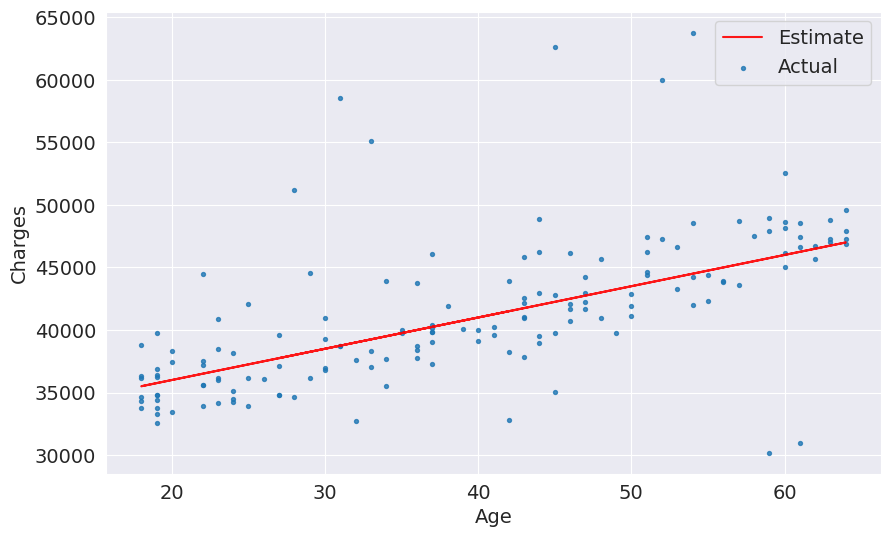

In [108]:
try_parameters(w,b)

In [109]:
targets = smoker_df_chargesGr30k['charges']
predicted = estimate_charges(smoker_df_chargesGr30k.age, w,b)

In [110]:
rmse(targets, predicted)

np.float64(4674.071607262811)

### Linear Regression using a Single Feature

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
model = LinearRegression()


In [113]:
smoker_df_chargesGr30k

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600


In [114]:
inputAgeGr30k = smoker_df_chargesGr30k[['age']]
targetChargesGr30k = smoker_df_chargesGr30k.charges
print('input.shape : ', inputAgeGr30k.shape)
print('targets.shape : ', targetChargesGr30k.shape)

input.shape :  (152, 1)
targets.shape :  (152,)


In [115]:
model.fit(inputAgeGr30k, targetChargesGr30k)

LinearRegression()

In [116]:
model.predict(pd.DataFrame([[23],[37],[61]],columns=['age']))

array([37052.46667931, 40687.67720987, 46919.46669084])

In [117]:
predictionChargesGr30k = model.predict(inputAgeGr30k)


In [118]:
predictionChargesGr30k

array([38091.09825947, 38870.07194459, 39908.70352475, 39129.72983963,
       36792.80878427, 38350.75615451, 40168.36141979, 46659.8087958 ,
       40428.01931483, 40428.01931483, 46140.49300572, 35754.17720411,
       36792.80878427, 40687.67720987, 45880.83511068, 46400.15090076,
       47698.44037596, 46919.46669084, 47438.78248092, 42505.28247515,
       39389.38773467, 43024.59826524, 38870.07194459, 35754.17720411,
       47438.78248092, 40428.01931483, 38091.09825947, 36013.83509915,
       37052.46667931, 47438.78248092, 45101.86142556, 44063.2298454 ,
       45621.17721564, 36013.83509915, 36013.83509915, 43024.59826524,
       44063.2298454 , 45101.86142556, 46400.15090076, 37571.78246939,
       39129.72983963, 42245.62458011, 38091.09825947, 39908.70352475,
       42764.9403702 , 47698.44037596, 46919.46669084, 44063.2298454 ,
       37831.44036443, 37312.12457435, 45361.5193206 , 47698.44037596,
       46919.46669084, 41466.65089499, 39649.04562971, 37312.12457435,
      

In [119]:
targetChargesGr30k

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1301    46718.16325
1303    37829.72420
1308    33900.65300
1313    36397.57600
1323    43896.37630
Name: charges, Length: 152, dtype: float64

### Let's compute the RMSE loss to evalute the model.

In [120]:
rmse(targetChargesGr30k, predictionChargesGr30k)

np.float64(4649.331977798582)

Seems like our prediction is off by $4000 on average, which is not too bad cosidering the fact that there are several outliers.

In [121]:
# W
model.coef_

array([259.65789504])

In [122]:
# b
model.intercept_

np.float64(31080.33509338287)

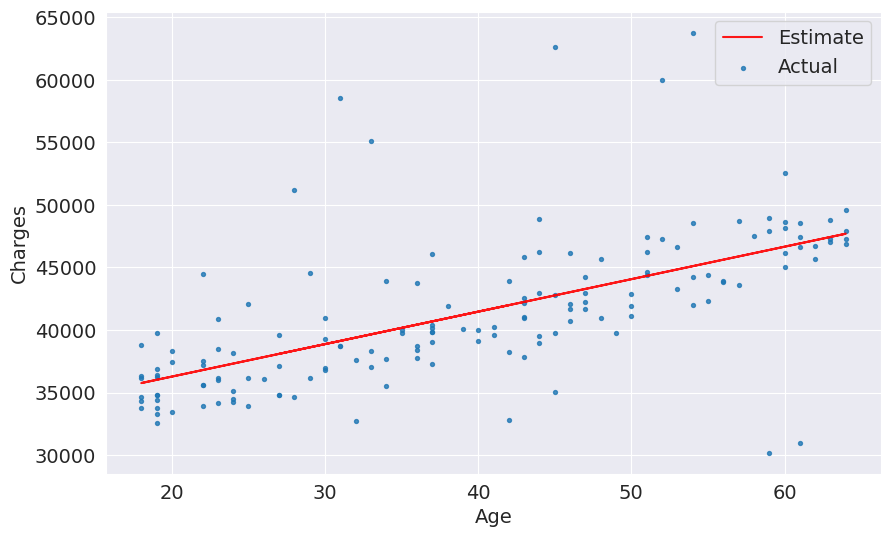

In [123]:
try_parameters(model.coef_, model.intercept_)

### Charges of Smoker whose charge is  less than  or equal to $30k

In [124]:
smoker_df_charges = medical_df[(medical_df['smoker'] == 'yes') & (medical_df['charges'] < 30000)]
smoker_df_charges

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
52,48,male,28.000,1,yes,southwest,23568.27200
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1306,29,female,21.850,0,yes,northeast,16115.30450
1307,32,male,28.120,4,yes,northwest,21472.47880
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

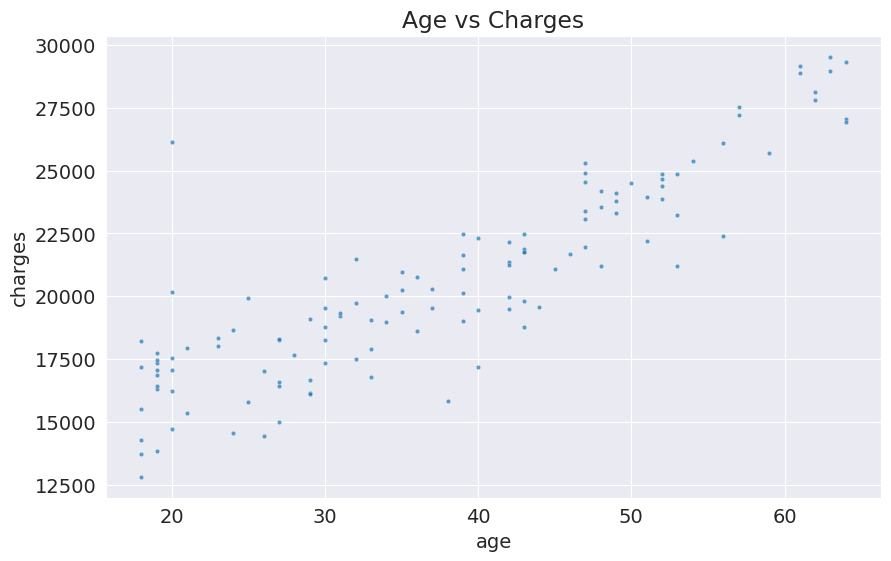

In [125]:
plt.title('Age vs Charges')
sns.scatterplot(data= smoker_df_charges, x='age', y='charges',alpha=0.7, s = 10)

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
model = LinearRegression()

In [128]:
input = smoker_df_charges[['age']]
target = smoker_df_charges.charges
print('input.shape : ', input.shape)
print('target.shape : ', target.shape)

input.shape :  (122, 1)
target.shape :  (122,)


In [129]:
model.fit(input, target)

LinearRegression()

In [130]:
model.predict(pd.DataFrame([[23],[37],[61]],columns=['age']))

array([16848.54562476, 20408.21561215, 26510.50701912])

In [131]:
prediction = model.predict(input)
prediction

array([15831.49705693, 26764.76916107, 23205.09917368, 24476.40988346,
       16085.75919889, 18119.85633454, 17865.59419258, 22442.31274781,
       25239.19630933, 20662.47775411, 16085.75919889, 18374.1184765 ,
       15831.49705693, 19645.42918628, 18628.38061845, 21679.52632194,
       23205.09917368, 15577.23491497, 21679.52632194, 19899.69132824,
       21679.52632194, 21171.00203802, 15831.49705693, 27019.03130303,
       15577.23491497, 16085.75919889, 24222.1477415 , 21171.00203802,
       21171.00203802, 15831.49705693, 22950.83703172, 24476.40988346,
       24222.1477415 , 15831.49705693, 16848.54562476, 20916.73989607,
       17865.59419258, 22188.05060585, 17611.33205063, 20153.9534702 ,
       27019.03130303, 25239.19630933, 21679.52632194, 18628.38061845,
       24730.67202542, 26510.50701912, 16340.02134084, 23967.88559955,
       20916.73989607, 23459.36131563, 16340.02134084, 15831.49705693,
       26001.9827352 , 23459.36131563, 20916.73989607, 24222.1477415 ,
      

In [132]:
target

0       16884.92400
11      27808.72510
52      23568.27200
58      23244.79020
64      14711.74380
           ...     
1306    16115.30450
1307    21472.47880
1314    18765.87545
1321    28101.33305
1337    29141.36030
Name: charges, Length: 122, dtype: float64

In [133]:
def rmseGr30k(target, prediction):
    return np.sqrt(np.mean(np.square(target - prediction)))

In [134]:
rmse(target, prediction)

np.float64(1850.553454926379)

In [135]:
def try_parameters(w,b):
    ages = smoker_df_charges.age
    target = smoker_df_charges.charges
    
    predictions = estimate_charges(ages, w,b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel("Age");
    plt.ylabel("Charges")
    plt.legend(['Prediction','Actual']);
    
    loss = rmse(targets, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  nan


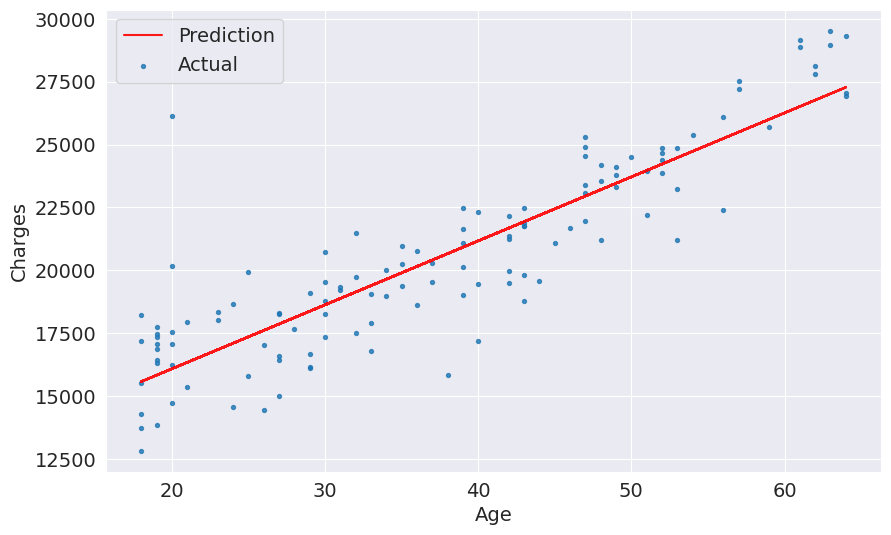

In [136]:
try_parameters(model.coef_, model.intercept_)

### See homework in homework file
"# Exercise: " Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? why or why not ? Try it out and see if you can justify your answer with data

### For smoker  

In [137]:
smoker_mdf = medical_df[medical_df['smoker'] == 'yes']

In [138]:
smoker_mdf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [139]:
# Create inputs and targest
inputs, targets = smoker_mdf[['age', 'bmi','children']], smoker_mdf['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  5718.202480524154


In [140]:
sex_code = {'female':0, 'male':1}
smoker_mdf['sex_code'] = smoker_mdf.sex.map(sex_code)

/tmp/ipykernel_1483/799698408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker_mdf['sex_code'] = smoker_mdf.sex.map(sex_code)


In [141]:
smoker_mdf.head()

,age,sex,bmi,children,smoker,region,charges,sex_code
0,19,female,27.90,0,yes,southwest,16884.9240,0
11,62,female,26.29,0,yes,southeast,27808.7251,0
14,27,male,42.13,0,yes,southeast,39611.7577,1
19,30,male,35.30,0,yes,southwest,36837.4670,1
23,34,female,31.92,1,yes,northeast,37701.8768,0


In [142]:
# Create inputs and targest
inputs, targets = smoker_mdf[['age', 'bmi','children','sex_code']], smoker_mdf['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  5715.398998862517


less effect

In [145]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()   
enc.fit(smoker_mdf[['region']])  # this line used for basically for identifying the region
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [146]:
one_hot = enc.transform(smoker_mdf[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], shape=(274, 4))

In [147]:
smoker_mdf[['northeast','northwest','southeast','southwest']]  = one_hot 

/tmp/ipykernel_1483/124419920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker_mdf[['northeast','northwest','southeast','southwest']]  = one_hot
/tmp/ipykernel_1483/124419920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smoker_mdf[['northeast','northwest','southeast','southwest']]  = one_hot
/tmp/ipykernel_1483/124419920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [148]:
smoker_mdf.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.9240,0,0.0,0.0,0.0,1.0
11,62,female,26.29,0,yes,southeast,27808.7251,0,0.0,0.0,1.0,0.0
14,27,male,42.13,0,yes,southeast,39611.7577,1,0.0,0.0,1.0,0.0
19,30,male,35.30,0,yes,southwest,36837.4670,1,0.0,0.0,0.0,1.0
23,34,female,31.92,1,yes,northeast,37701.8768,0,1.0,0.0,0.0,0.0


In [150]:
# Create inputs and targest
inputs, targets = smoker_mdf[['age', 'bmi','children','sex_code','northeast','northwest','southeast','southwest']], smoker_mdf['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  5668.4678821121515


about $400 effect which is better than (6041.6796511744515) model than working on together smoker and non smoker

### Now For non_smoker 

In [151]:
non_smoker_mdf = medical_df[medical_df['smoker'] == 'no']
non_smoker_mdf

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [152]:
# Create inputs and targest
inputs, targets = non_smoker_mdf[['age', 'bmi','children']], non_smoker_mdf['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4608.470405038247


In [153]:
sex_code = {'female':0, 'male':1}
non_smoker_mdf['sex_code'] = non_smoker_mdf.sex.map(sex_code)

/tmp/ipykernel_1483/1884977401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_smoker_mdf['sex_code'] = non_smoker_mdf.sex.map(sex_code)


In [154]:
non_smoker_mdf.head()

,age,sex,bmi,children,smoker,region,charges,sex_code
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
5,31,female,25.740,0,no,southeast,3756.62160,0


In [155]:
# Create inputs and targest
inputs, targets = non_smoker_mdf[['age', 'bmi','children','sex_code']], non_smoker_mdf['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4601.343101319802


In [156]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()   
enc.fit(non_smoker_mdf[['region']])  # this line used for basically for identifying the region
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [157]:
one_hot = enc.transform(non_smoker_mdf[['region']]).toarray()
one_hot

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], shape=(1064, 4))

In [158]:
non_smoker_mdf[['northeast','northwest','southeast','southwest']]  = one_hot 

/tmp/ipykernel_1483/357121849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_smoker_mdf[['northeast','northwest','southeast','southwest']]  = one_hot
/tmp/ipykernel_1483/357121849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_smoker_mdf[['northeast','northwest','southeast','southwest']]  = one_hot
/tmp/ipykernel_1483/357121849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [159]:
non_smoker_mdf.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0.0,0.0,1.0,0.0


In [160]:
# Create inputs and targest
inputs, targets = non_smoker_mdf[['age', 'bmi','children','sex_code','northeast','northwest','southeast','southwest']], non_smoker_mdf['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print("Loss: ", loss)

Loss:  4573.074988795492


### Smoker --> Loss:  5668.4678821121515
### Non-Smoker --> Loss:  4573.074988795492
### Smoker and Non-Smoker(Working as Whole) --> Loss:  6041.6796511744515

As you can see above making two different model is good than workig with single model on whole data set

    about $400 smoker effect which is better than (6041.6796511744515) model than working on together smoker and non smoker

    
    about $1468 non-smoker effect which is better than (6041.6796511744515) model than working on together smoker and non smoker